**OBJECTIVE**

To build a model that detects credit card fraud.

**IMPORT REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold

from sklearn.tree import DecisionTreeClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**READING DATA**

In [ ]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

**EXPLARATORY DATA ANALYSIS**

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
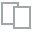
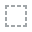
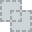
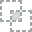
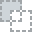
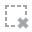
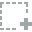
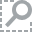
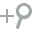
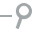
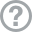
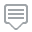
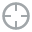
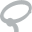
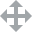
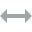
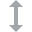
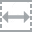
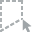
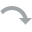
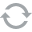
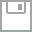
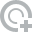
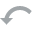
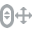
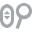
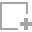
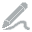
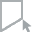
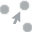
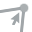
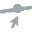

In [ ]:
from dataprep import eda

report = eda.create_report(df)
report

Plot the histogram of a variable from the dataset to see the skewness.

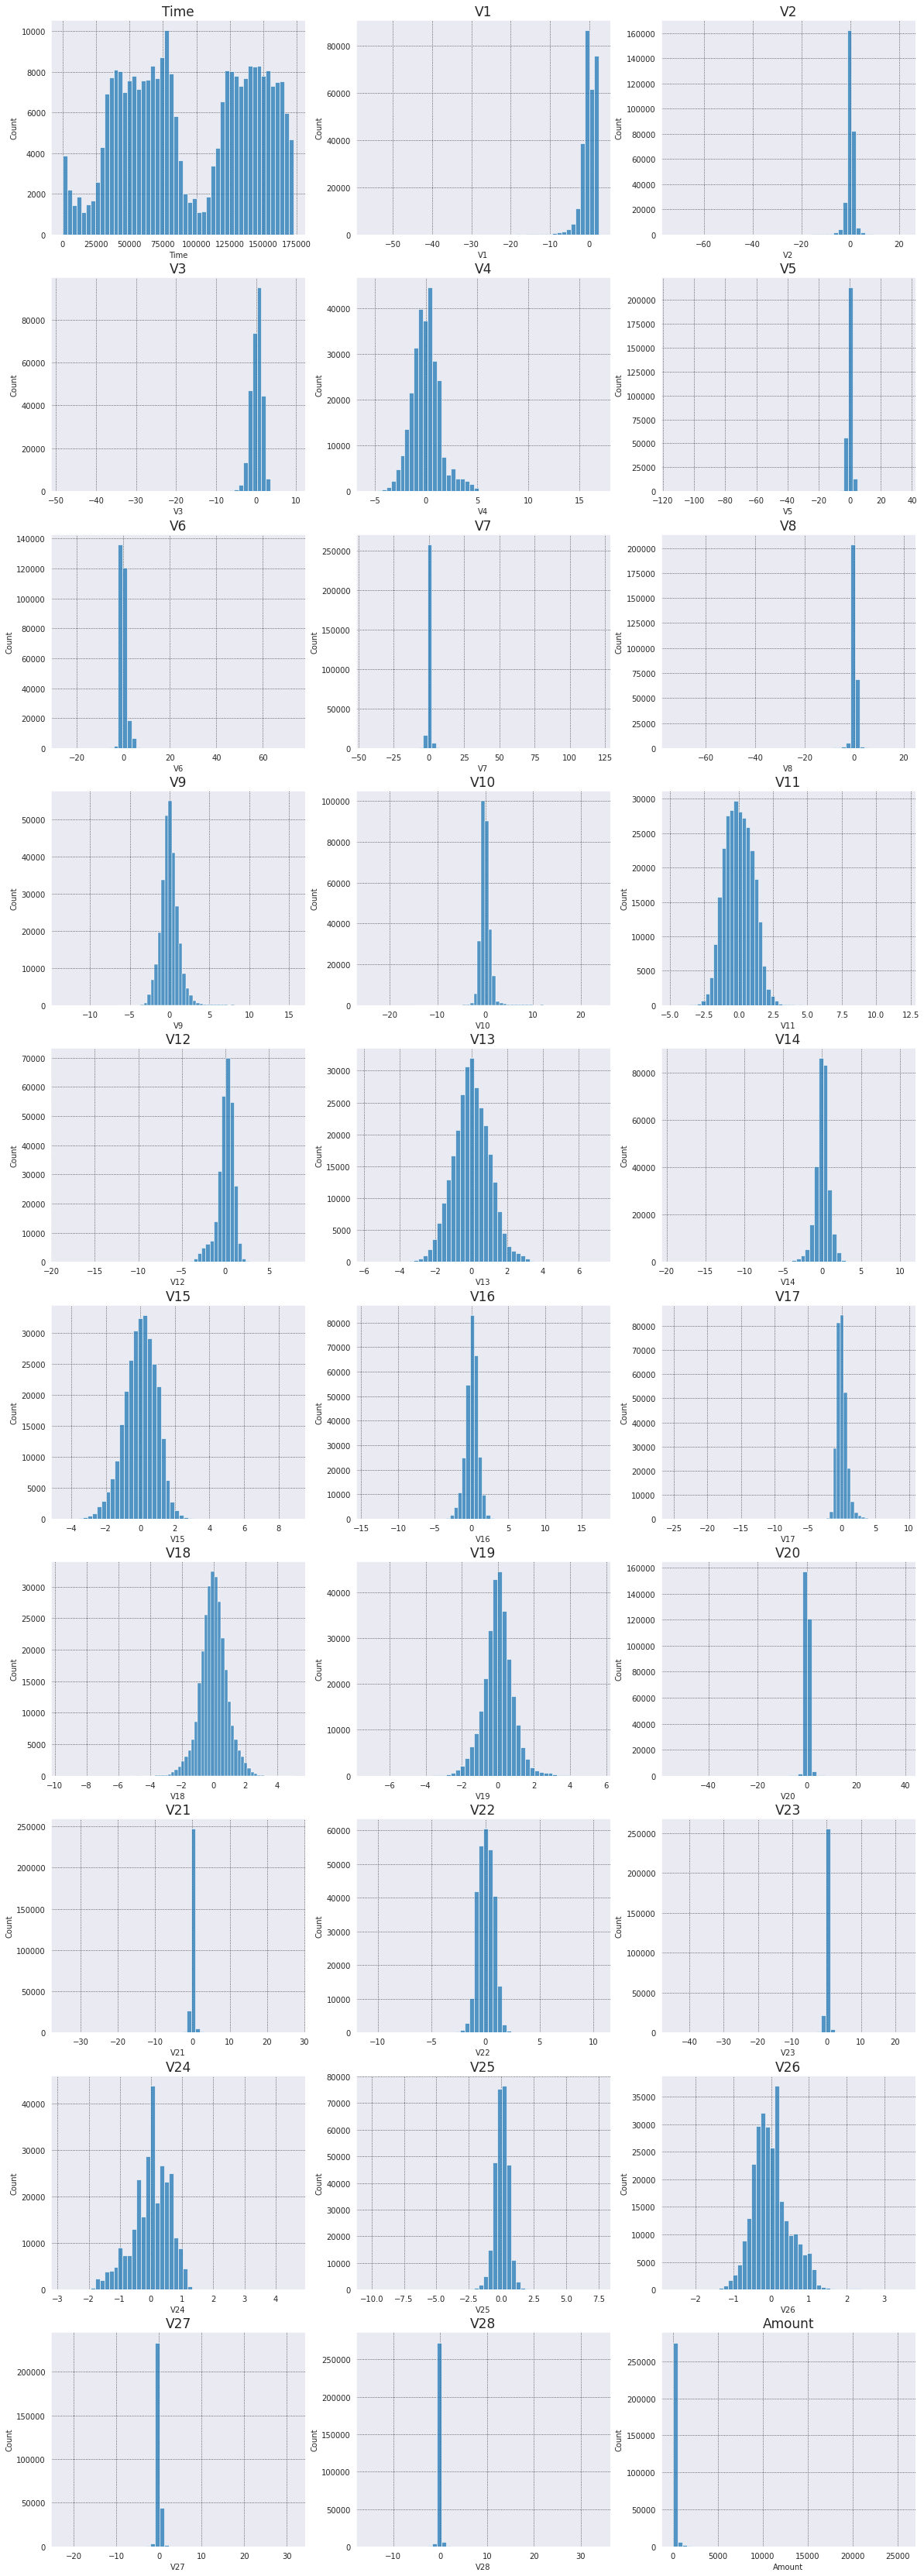

In [ ]:
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col][df.Class == 1], bins=50)
    sns.histplot(df[col][df.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

In [ ]:
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

Looks like there is clear relationship between amount and Class.

Average of amount is low for the fraudelant transactions. Lets Do further analysis to understand more.

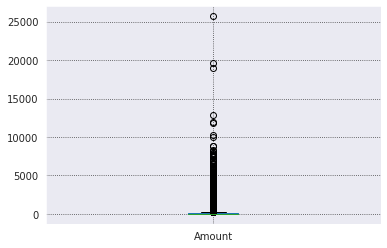

In [ ]:
df.boxplot('Amount')

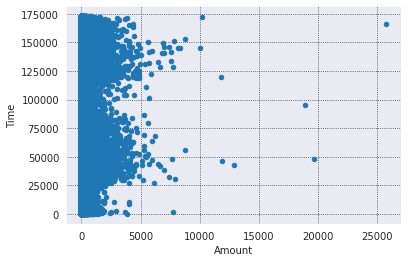

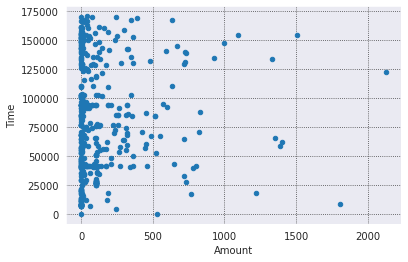

In [ ]:
df[df.Class == 0].plot.scatter('Amount','Time')
df[df.Class == 1].plot.scatter('Amount','Time')

In [ ]:
df[df.Amount > 10000].shape

(7, 31)

There are 7 record in dataset the Amount is greater than 10,000.00, with scatterplot we can see all of these transactions are belongs to non-fraudelent as well.


In [ ]:
df = df.drop(df[df.Amount > 10000].index, axis=0)

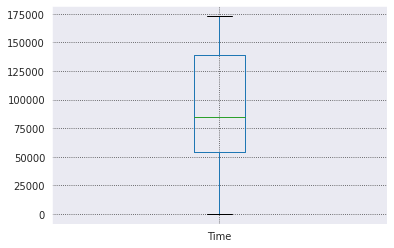

In [ ]:
df.boxplot('Time')

In [ ]:
x = df.drop('Class', axis=1)
y = df.Class.values

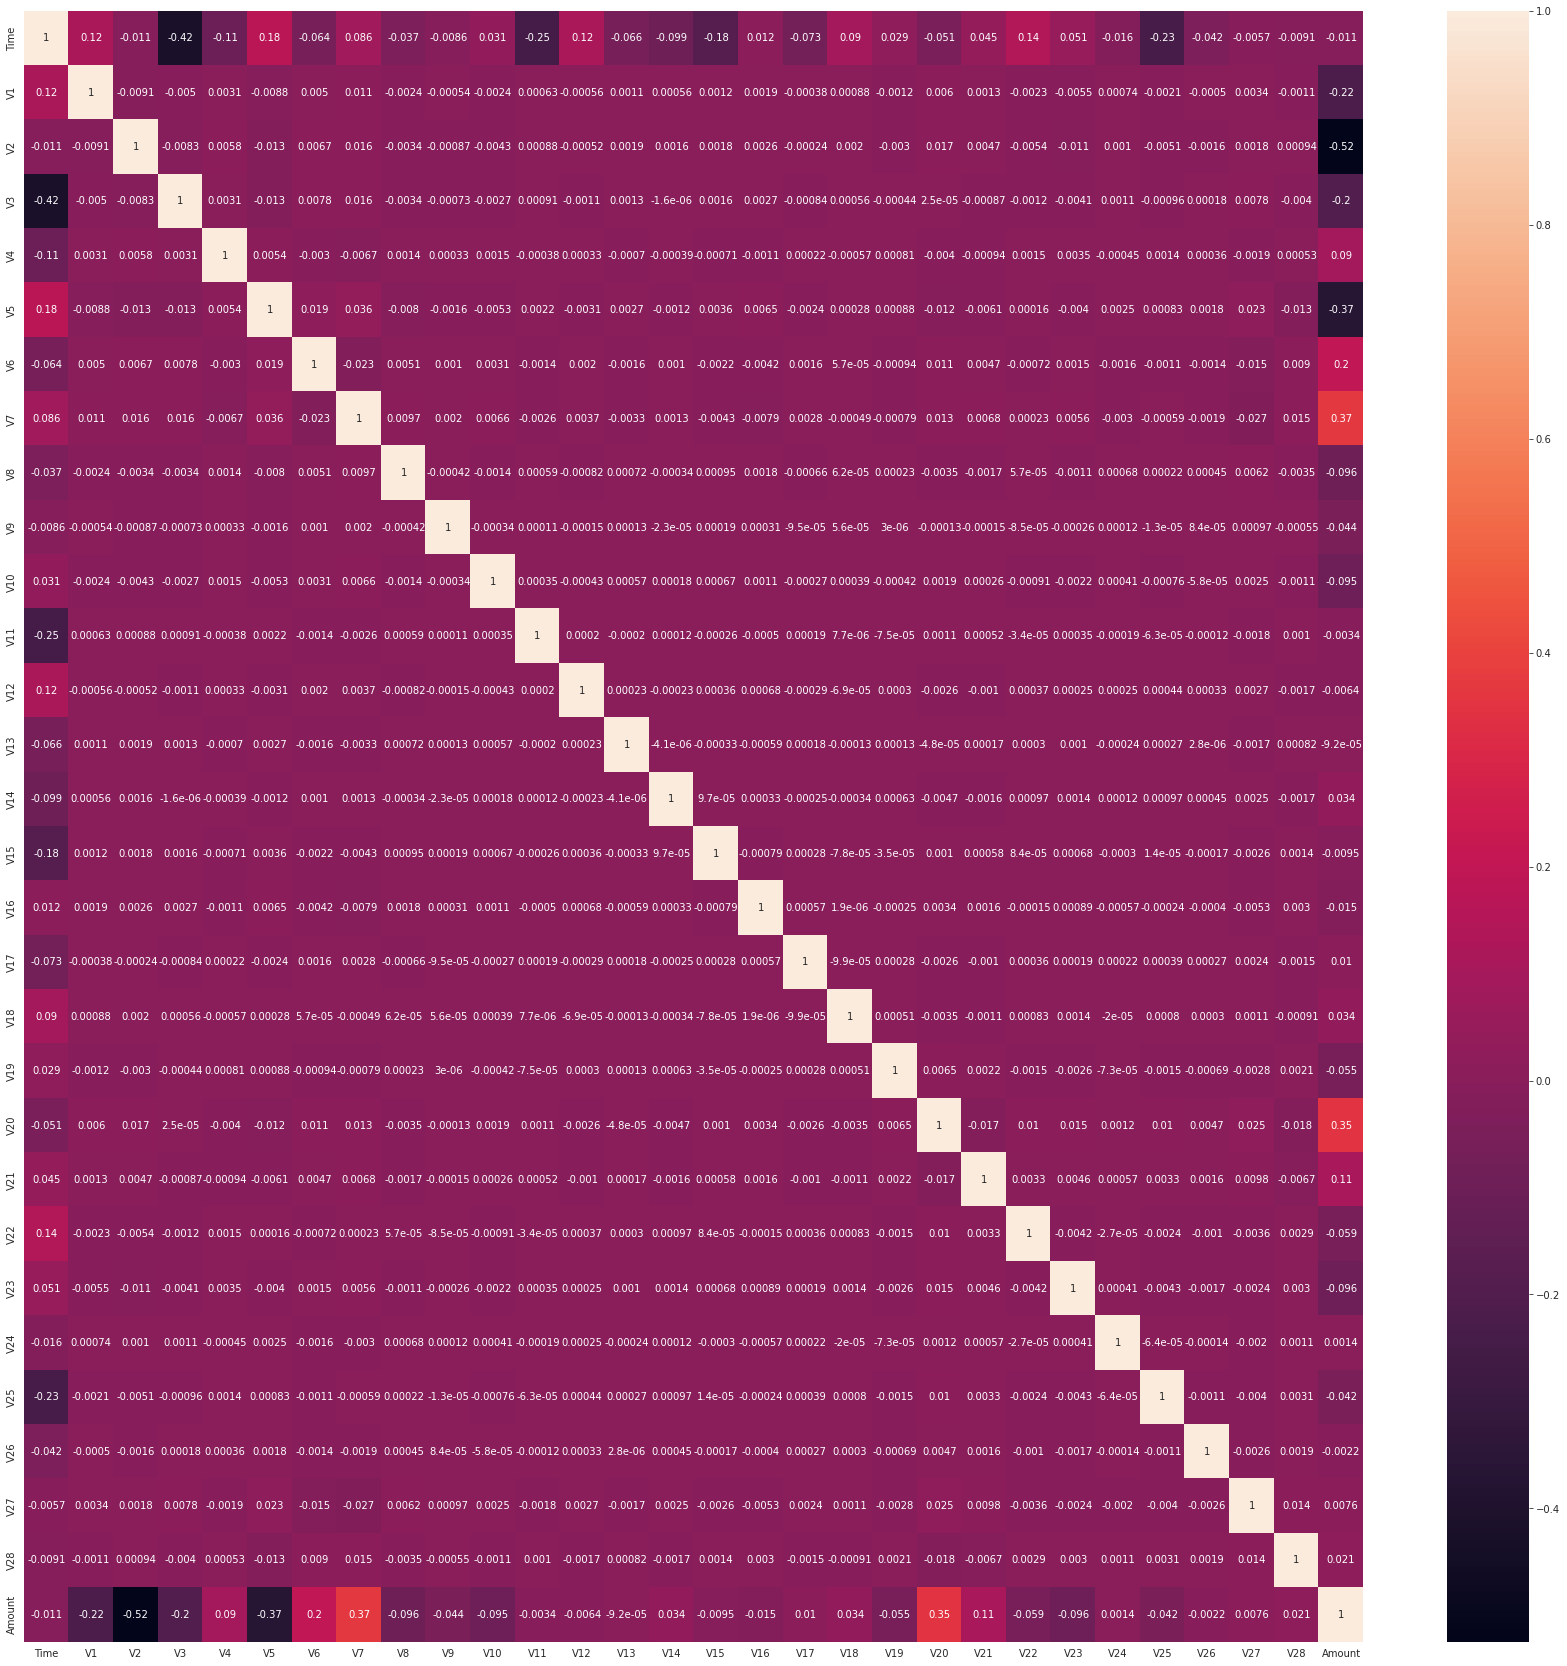

In [ ]:
corr_matrix = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Handling imbalance data.

In [ ]:
counts = df.Class.value_counts()
print(counts)
print(f'legimate {(counts[0] / sum(counts))*100}% and Fraudent {(counts[1] / sum(counts))*100}%')

0    284308
1       492
Name: Class, dtype: int64
legimate 99.82724719101124% and Fraudent 0.17275280898876405%


**Summary of EDA**


*   Data looks clean
*   No null values


*   Majority of features are well distributed around mean
*   There are some correlated features. but not strong enough to drop


*   Dataset is highly imbalanced.







**Resampling stratergy**

Dataset is highly imbalanced. Fraudulent transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. Let's do mix of oversampling and under sampling to cover more data points from none-fraudulent than taking just 492 records out of 284308 samples.

Lets take random 5% from non-fraudulent transactions
Then will oversample fraudulent transactions to match with non-fraudulent

In [ ]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and over sampling to increase number of samples
leg_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

no_of_samples = round(leg_df.shape[0] * 0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2,fraud_df],axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

x,y = ros.fit_resample(x_sampled,y_sampled)

In [ ]:
y.value_counts()

0    14215
1    14215
Name: Class, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10661
 1    10661
 Name: Class, dtype: int64, 1    3554
 0    3554
 Name: Class, dtype: int64)

**Defining Evaluation criteria**

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

Empty DataFrame
Columns: [Model, accuracy score,  Precision, Recall, f1_score]
Index: []

In [ ]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [ ]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

**Applying the Decision Tree classifier without downsampling the data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

First let's scale the data since most of the data in Amount and Time is very large compared to the other ones and it can heavily influence the classifier. 

We will use scikitlearn's standard scaler.

In [ ]:
scale=StandardScaler()

amount=df['Amount'].to_numpy() 
#standard scaler only takes one dimensional arrays
df['Amount']=scale.fit_transform(amount.reshape(-1,1))

time=df['Time'].to_numpy()
df['Time']=scale.fit_transform(time.reshape(-1,1))

In [ ]:
#divide the data into a set of feature values and target values
X_data=df.iloc[:,:30]
y_data=df['Class']

train_test_split will split the data into train and test sets randomly

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=20)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

Let's Check our accuracy score.

In [ ]:
clf.score(X_test,y_test)

0.9992977528089888

Accuracy is not enough

If we only go by the accuracy score it is easy to trick the model since we could have also gotten it by just putting the prections as zeros .i.e. there were no frauds and easily get a better score since most of the data belongs to the 'normal transactions' categories. 

So what we can do here is use the recall score to get a better intuition on how the model performs.

In [ ]:
predicted_yval=clf.predict(X_test)

Why Recall?

If we want to detect fraud in a transaction, It is more efficient to capture more fraud even if we capture a few good transactions with them atleast the system would catch 9/10 or 10/10 frauds transactions in the process

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('precision :{}'.format(precision_score(y_test,predicted_yval)))
print('recall: {}'.format(recall_score(y_test,predicted_yval)))

precision :0.8166666666666667
recall: 0.7777777777777778


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,predicted_yval)

0.7967479674796747

In [ ]:
#function to get the number of fraud transactions that evaded the system
def get_frauds_not_detected(ytrue,predictions):
    wrong_calculations= ytrue[ytrue!=predictions]
    return wrong_calculations[wrong_calculations==1].shape[0]

In [ ]:
print('total_frauds {}'.format(y_test[y_test==1].shape[0]))

total_frauds 126


Doing some Downsampling

In the last attempt at creating a fraud detection system, the data was imbalanced. 

There was a greater representation of a data from a particular class than the other hence we make another attempt by selecting all the fraud cases and same number of normal cases to try to get a better recall.

In [ ]:
no_fraud_data=df[df['Class']==0]

In [ ]:
fraud_data=df[df['Class']==1]

total_frauds=fraud_data.shape[0]
#for downsampling we will need to select the set of data that are not too large than that frauds

no_fraud_indices=np.random.choice(no_fraud_data.index,total_frauds,replace=False)
fraud_indices=fraud_data.index

In [ ]:
under_sampled_data=df.iloc[list(no_fraud_indices)+list(fraud_indices)]

In [ ]:
under_sampled_data[under_sampled_data['Class']==1]

Time         V1         V2         V3        V4         V5  \
184379  0.661331  -1.141559   1.927650  -3.905356 -0.073943  -0.044858   
541    -1.988036  -2.312227   1.951992  -1.609851  3.997906  -0.522188   
623    -1.986647  -3.043541  -3.157307   1.088463  2.288644   1.359805   
4920   -1.902625  -2.303350   1.759247  -0.359745  2.330243  -0.821628   
6108   -1.849475  -4.397974   1.358367  -2.592844  2.679787  -1.128131   
...          ...        ...        ...        ...       ...        ...   
150687 -0.019305 -10.300820   6.483095 -15.076363  6.554191  -8.880252   
151009 -0.009513 -26.457745  16.497472 -30.177317  8.904157 -17.892600   
151011 -0.009471 -15.192064  10.432528 -19.629515  8.046075 -12.838167   
154697  0.164489  -4.221221   2.871121  -5.888716  6.890952  -3.404894   
280149  1.569603  -0.676143   1.126366  -2.213700  0.468308  -1.120541   

              V6         V7         V8        V9  ...       V21       V22  \
184379 -1.756999  -1.217416   0.364563 -2.770148  ...  0.102081 -0.531496   
541    -1.426545  -2.537387   1.391657 -2.770089  ...  0.517232 -0.035049   
623    -1.064823   0.325574  -0.067794 -0.270953  ...  0.661696  0.435477   
4920   -0.075788   0.562320  -0.399147 -0.238253  ... -0.294166 -0.932391   
6108   -1.706536  -3.496197  -0.248778 -0.247768  ...  0.573574  0.176968   
...          ...        ...        ...       ...  ...       ...       ...   
150687 -4.471672 -14.900689   3.840170 -4.358441  ...  1.508748  1.041642   
151009 -1.227904 -31.197329 -11.438920 -9.462573  ... -8.755698  3.460893   
151011 -1.875859 -21.359738  -3.717850 -5.969782  ... -3.474097  1.765446   
154697 -1.154394  -7.739928   2.851363 -2.507569  ...  1.620591  1.567947   
280149 -0.003346  -2.234739   1.210158 -0.652250  ...  0.751826  0.834108   

             V23       V24       V25       V26       V27       V28    Amount  \
184379 -0.328741  0.393100  0.568435  0.786605 -0.146102  0.076211 -0.266624   
541    -0.465211  0.320198  0.044519  0.177840  0.261145 -0.143276 -0.372491   
623     1.375966 -0.293803  0.279798 -0.145362 -0.252773  0.035764  1.867658   
4920    0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  0.643537   
6108   -0.436207 -0.053502  0.252405 -0.657488 -0.827136  0.849573 -0.122644   
...          ...       ...       ...       ...       ...       ...       ...   
150687 -0.682790  0.573544 -1.602389 -0.393521 -0.468893  0.105920 -0.368256   
151009  0.896538  0.254836 -0.738097 -0.966564 -7.263482 -1.324884 -0.368256   
151011  1.701257  0.381587 -1.413417 -1.023078 -2.634761 -0.463931 -0.368256   
154697 -0.578007 -0.059045 -1.829169 -0.072429  0.136734 -0.599848 -0.340350   
280149  0.190944  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042651   

        Class  
184379      1  
541         1  
623         1  
4920        1  
6108        1  
...       ...  
150687      1  
151009      1  
151011      1  
154697      1  
280149      1  

[162 rows x 31 columns]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(under_sampled_data.iloc[:,:30],
                                               under_sampled_data['Class'])

**Logistic Regression**

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.991869918699187
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       203
           1       1.00      0.95      0.98        43

    accuracy                           0.99       246
   macro avg       1.00      0.98      0.99       246
weighted avg       0.99      0.99      0.99       246



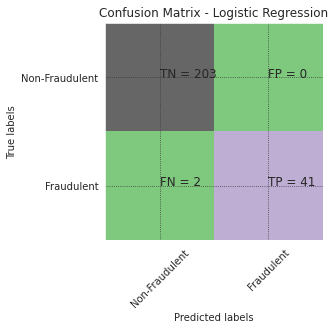

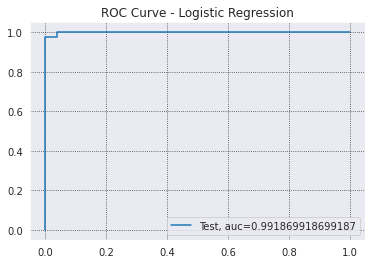

In [ ]:
lr_model = LogisticRegression(max_iter=200,random_state=12)
lr_model.fit(X_train,y_train)
pred1 = lr_model.predict(X_test)
prob1 = lr_model.predict_proba(X_test)
print_results("Logistic Regression", y_test, pred1,prob1[:,-1])

**Logistic Regression CV**

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.991869918699187
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       203
           1       1.00      0.95      0.98        43

    accuracy                           0.99       246
   macro avg       1.00      0.98      0.99       246
weighted avg       0.99      0.99      0.99       246



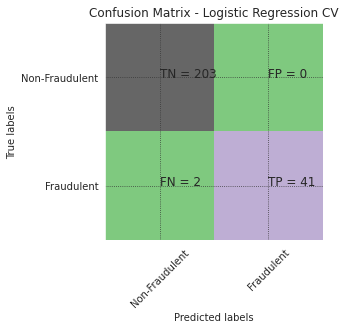

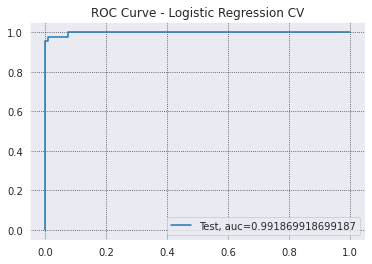

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

cv_num = KFold(n_splits=10, shuffle=True, random_state=12)
lr_modelCV = LogisticRegressionCV(max_iter=200,penalty='l2',scoring='roc_auc',cv=cv_num,tol=10,random_state=12)
lr_modelCV.fit(X_train,y_train)
pred2 = lr_modelCV.predict(X_test)
prob2 = lr_modelCV.predict_proba(X_test)
print_results("Logistic Regression CV", y_test, pred2,prob2[:,-1])

In [ ]:
evaluation_df

Model  accuracy score   Precision    Recall  f1_score
0     Logistic Regression         0.99187         1.0  0.953488   0.97619
1  Logistic Regression CV         0.99187         1.0  0.953488   0.97619

**Using Decision Tree**

In [ ]:
accuracy=[]
recall_scores=[]
max_depths=[2,4,6,8,10,12,14]
for n in max_depths:
    clf_u=DecisionTreeClassifier(max_depth=n)
    clf_u.fit(X_train,y_train)
    predict=clf_u.predict(X_test)
    recall_scores.append(recall_score(y_test,predict))
    accuracy.append(clf_u.score(X_test,y_test))

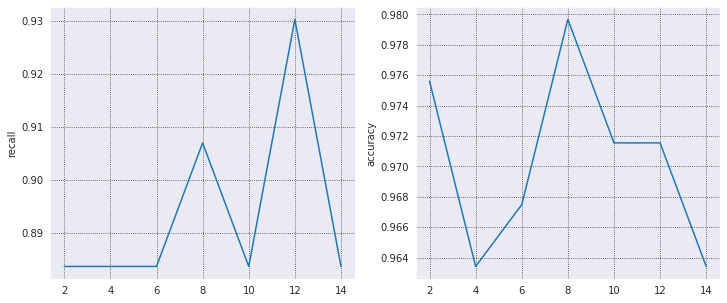

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

figs=[ax1,ax2]

def plot_graphs(fig_index,y,y_label,X=max_depths):
    global figs
    figs[fig_index].plot(X,y)
    figs[fig_index].set_ylabel(y_label)

# plot_graph(np.arange(7),accuracy)
plot_graphs(1,accuracy,'accuracy')
plot_graphs(0,recall_scores,'recall')

We select the parameter that results in a greater recall.

In [ ]:
#training the decison tree classifier with the max depth that has the maximum recall
max_depth=max_depths[recall_scores.index(max(recall_scores))]
clf_u=DecisionTreeClassifier(max_depth=max_depth)
clf_u.fit(X_train,y_train)
predict=clf_u.predict(X_test)
recall_score(y_test,predict)

print('max_depth with maximum recall  {}'.format(max_depth))

max_depth with maximum recall  12


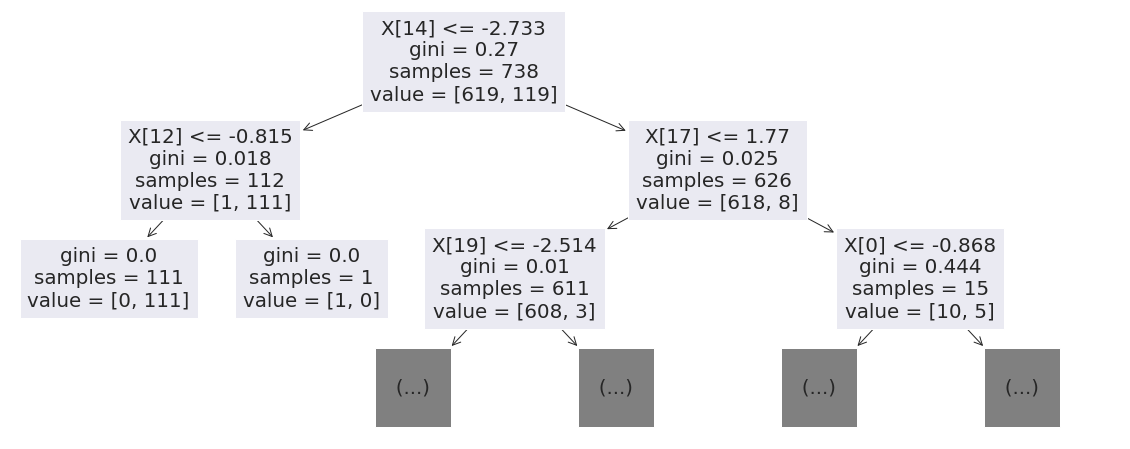

In [ ]:
import sklearn
plt.figure(figsize=(20,8))
sklearn.tree.plot_tree(clf_u,max_depth=2);

In [ ]:
evaluation_df

Model  accuracy score   Precision    Recall  f1_score
0     Logistic Regression         0.99187         1.0  0.953488   0.97619
1  Logistic Regression CV         0.99187         1.0  0.953488   0.97619